In [1]:
import mne
from mne.channels import make_standard_montage
import os

ModuleNotFoundError: No module named 'mne'

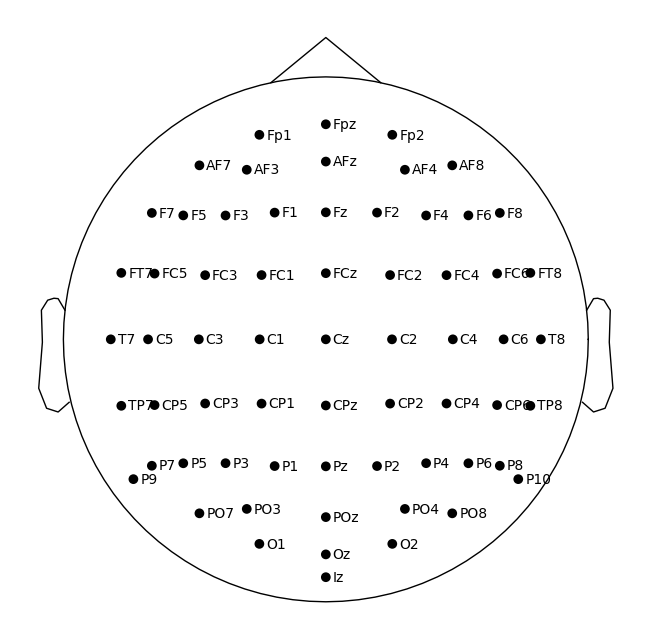

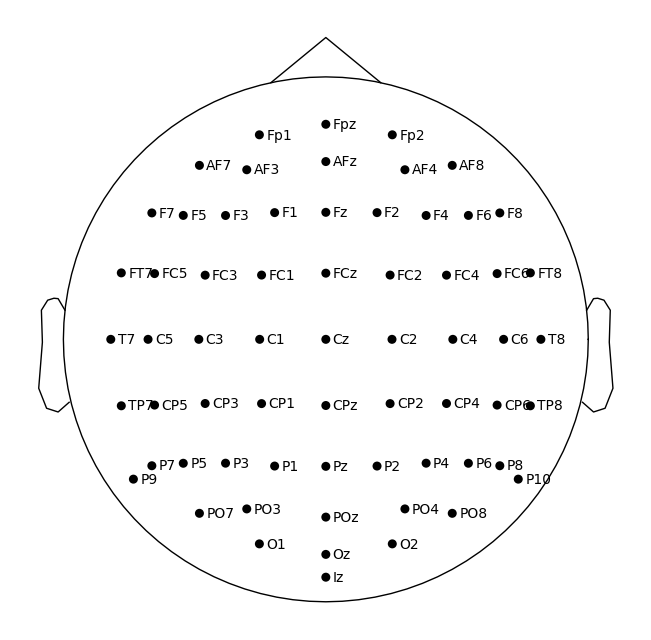

In [10]:
montage = make_standard_montage('biosemi64')
montage.plot()

In [11]:
raw = mne.io.read_raw_fif('openmiir/raw_data/P01-raw.fif', preload = True)
raw.info

Opening raw data file openmiir/raw_data/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


Measurement date,"January 28, 2015 17:39:57 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"61 EEG, 4 EOG, 1 Stimulus"
Bad channels,"P8, P10, T8"
EOG channels,"EXG1, EXG2, EXG3, EXG4"
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


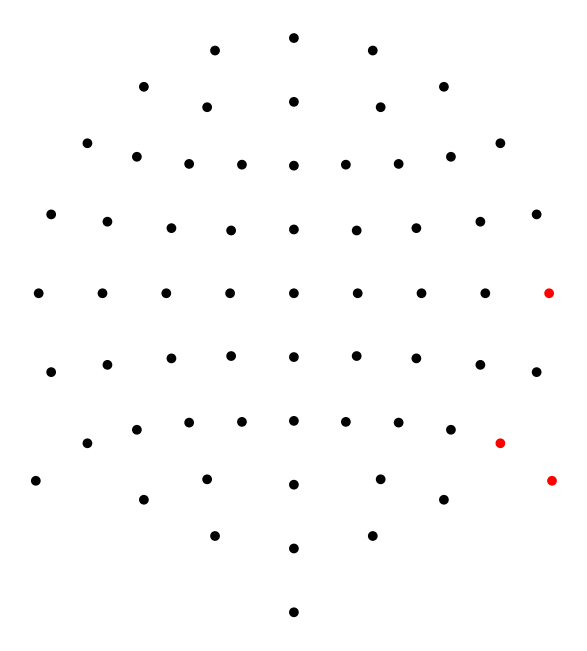

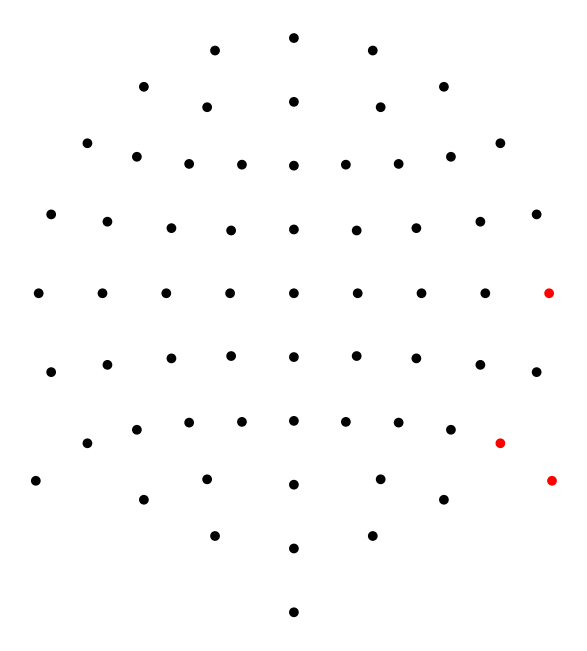

In [14]:
raw.plot_sensors()

Opening raw data file openmiir/raw_data/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


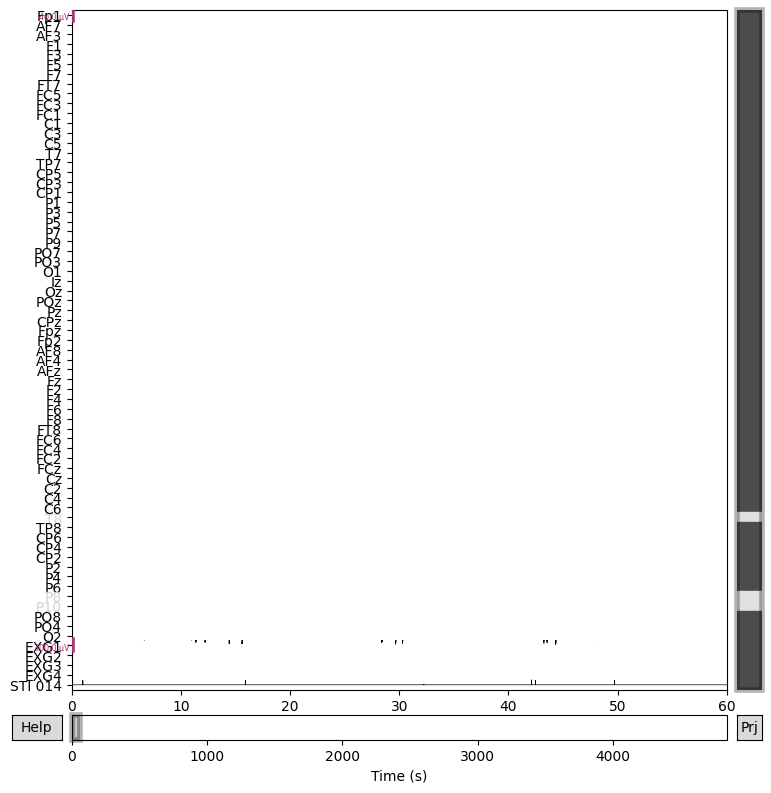

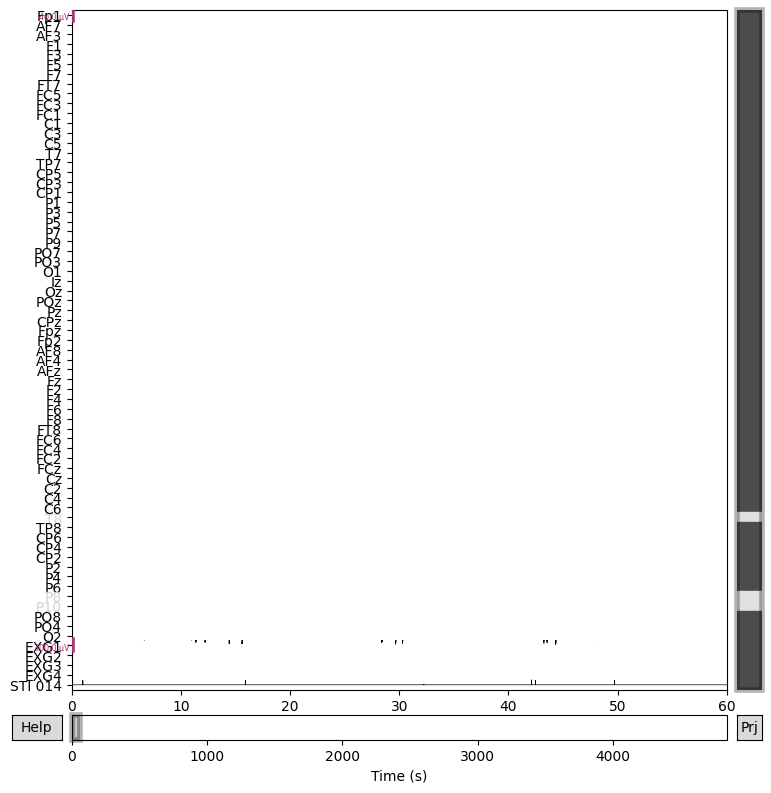

In [2]:
import mne
p01 = "openmiir/raw_data/P01-raw.fif"
raw = mne.io.read_raw_fif(p01, preload = True)
raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Define the number of participants, trials per participant, stimuli, and conditions
participants = ['P01', 'P04', 'P05', 'P06', 'P07', 'P09', 'P11', 'P12', 'P13', 'P14']
trials_per_participant = 60
num_trials_per_stimulus = 5
stimuli = [1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24]
conditions = ['Perception', 'Imagination_1', 'Imagination_2', 'Imagination_3']

# Create a list to store the data
data = []

# Generate the data for each participant, stimuli, and condition
# Create a list to store the data
data = []

# Generate the data for each participant, stimulus, and condition
for participant in participants:
    for stimulus in stimuli:
        # Shuffle the conditions for each stimulus
        random_conditions = random.sample(conditions, len(conditions))
        for condition_idx, condition in enumerate(random_conditions):
            data.append([participant, stimulus, condition, num_trials_per_stimulus])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Participant', 'Stimulus_ID', 'Condition', 'Num_Trials'])

# Display the DataFrame
print(df)

# Group the DataFrame by Stimulus_ID and Condition and calculate the total number of trials
grouped_df = df.groupby(['Stimulus_ID', 'Condition']).sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
for idx, stimulus_id in enumerate(stimuli):
    plt.subplot(3, 4, idx+1)
    subset_df = grouped_df[grouped_df['Stimulus_ID'] == stimulus_id]
    conditions = subset_df['Condition']
    num_trials = subset_df['Num_Trials']
    plt.bar(conditions, num_trials, color='skyblue')
    plt.title(f'Stimulus {stimulus_id}')
    plt.xlabel('Condition')
    plt.ylabel('Number of Trials')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()